In [119]:
#importing the requires packages for EDA and preprosessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [120]:
#importing the scv file using pandas
df = pd.read_csv("happiness_score_dataset.csv")

In [121]:
#viewing the forst 5 records for my dataframe
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [122]:
#basic statistical view for my dataframe
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [123]:
#info for my dataframe which tells about Dtype and null data if available i see there are no issing values which can be treated.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [124]:
# shape of my data frame so there are 158 rows and 12 columns 
df.shape

(158, 12)

In [125]:
#by using label_encoder i have converted my region columns from object to numeric
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Region']= label_encoder.fit_transform(df['Region'])
  
df['Region'].unique()

array([9, 5, 0, 4, 3, 6, 1, 2, 8, 7])

In [126]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [127]:
# The two columns Hapiness rank and country colums are nominal so drpiing the same from my dataframe
df.drop('Happiness Rank',axis=1,inplace=True)
df.drop('Country',axis=1,inplace=True)

In [128]:
#to check how much unique data i have for my region column
df['Region'].nunique()

10

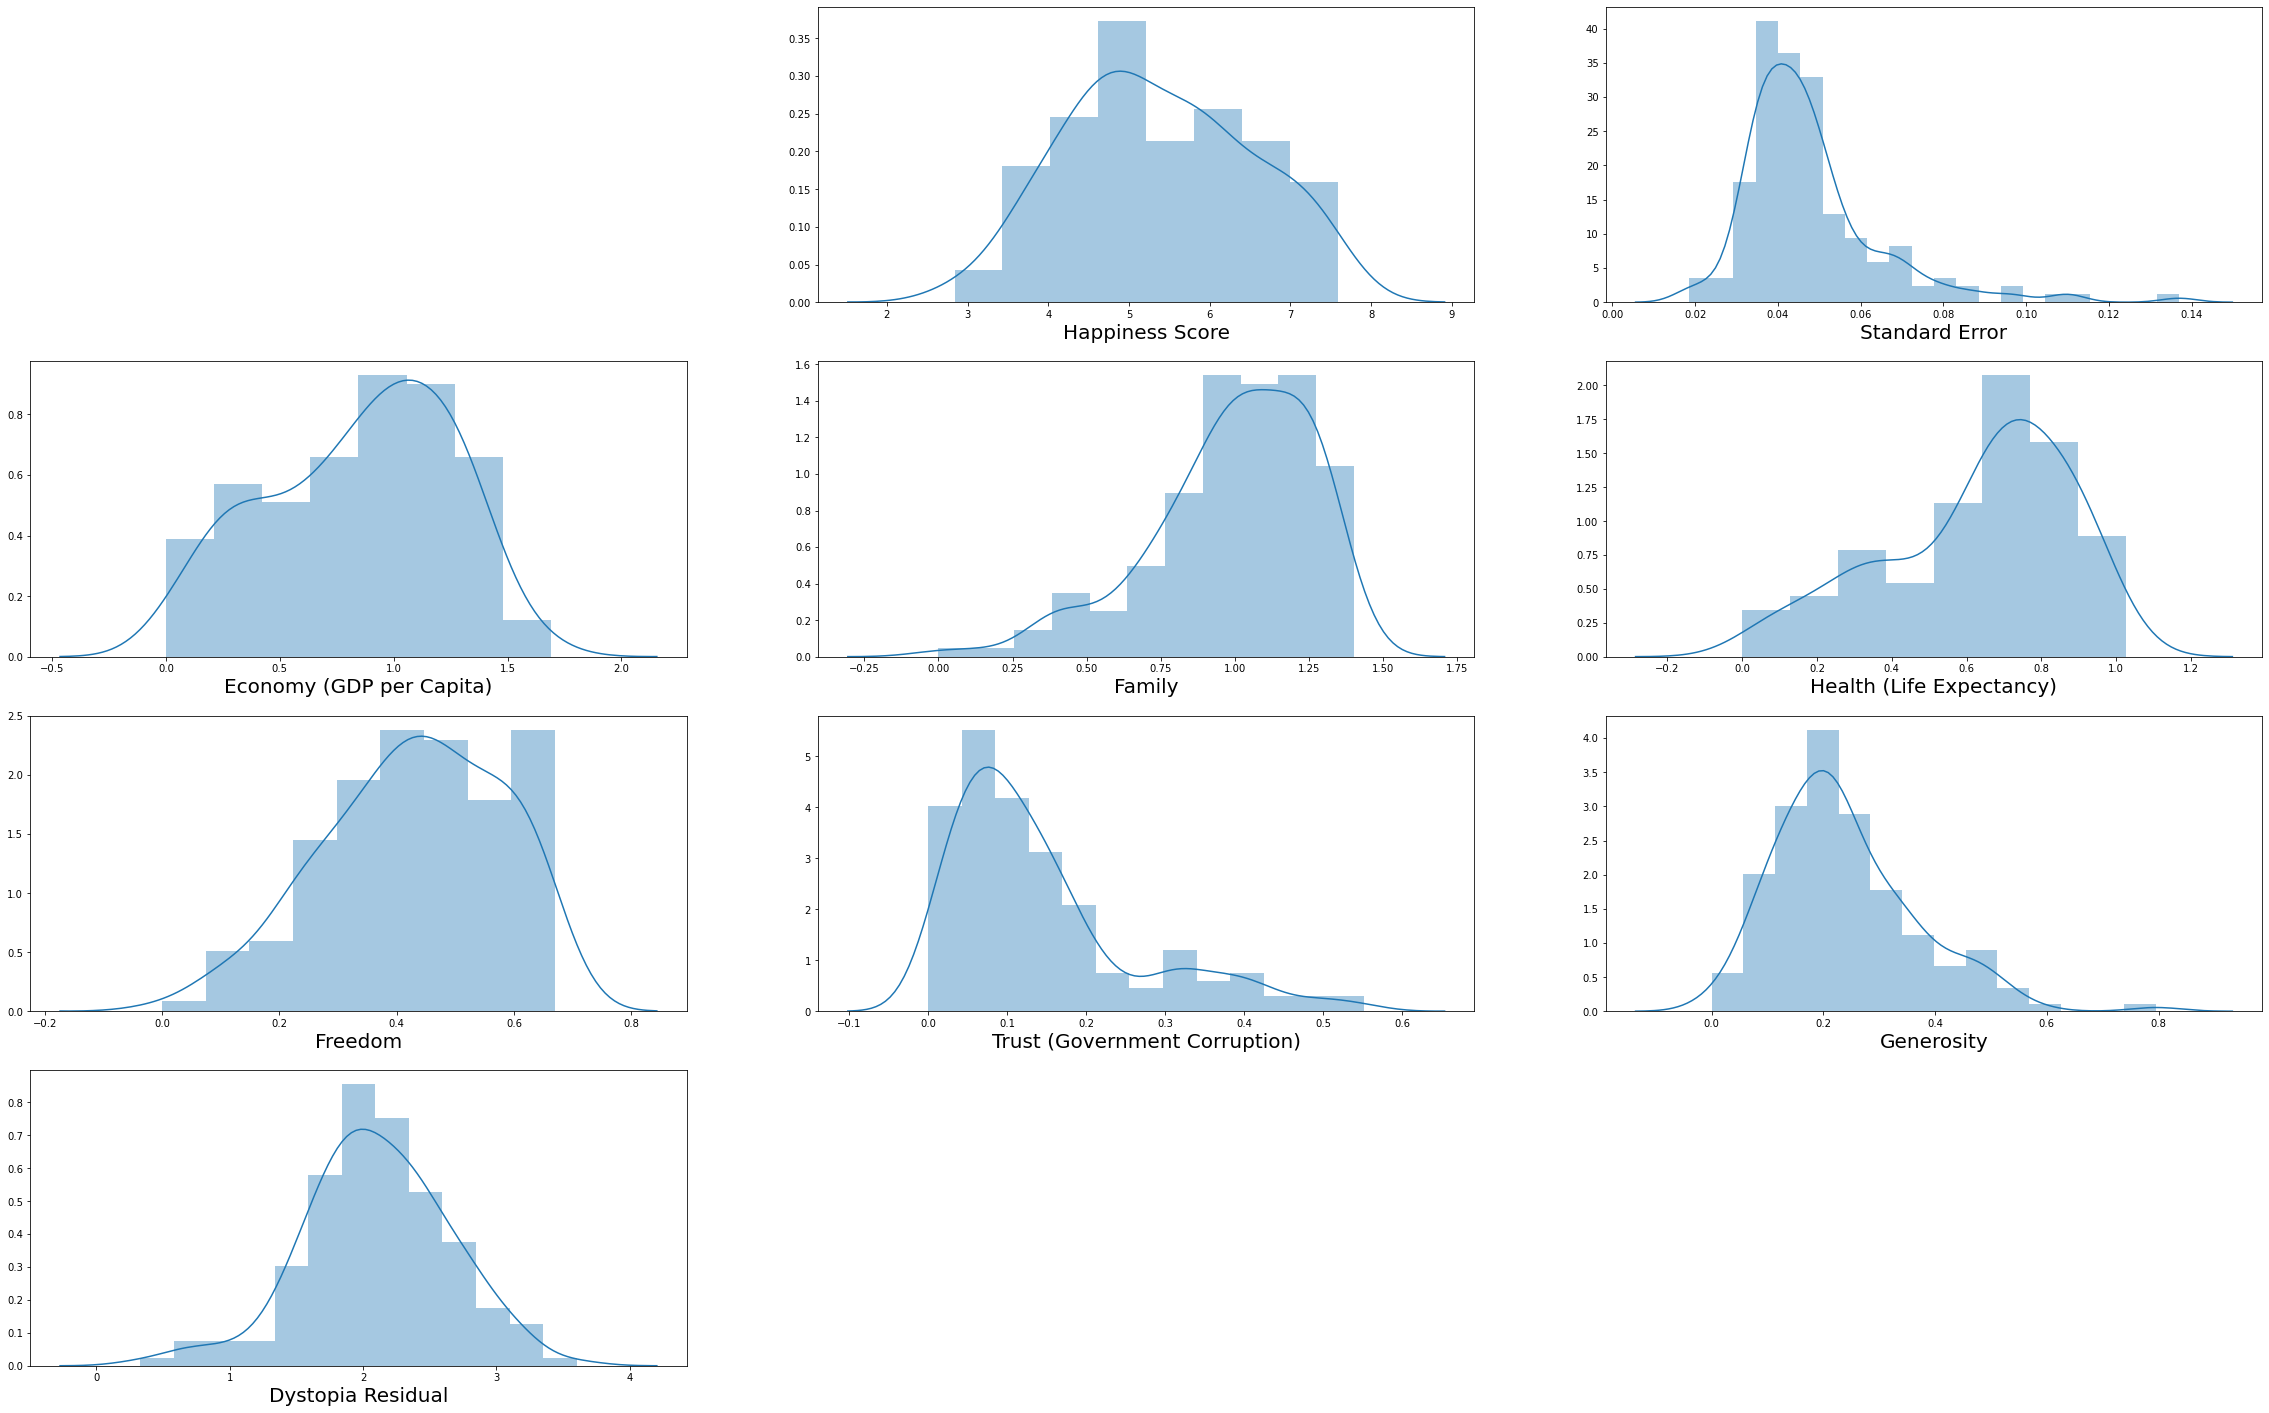

In [129]:
#plotting distribution plot for my dataframe to check and remove outliers
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df:
    
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        if plotnumber<=12:
            ax = plt.subplot(4,3,plotnumber)
            sns.distplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

In [130]:
#to print column names
df.columns

Index(['Region', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [131]:
#shape of the datframe
df.shape

(158, 10)

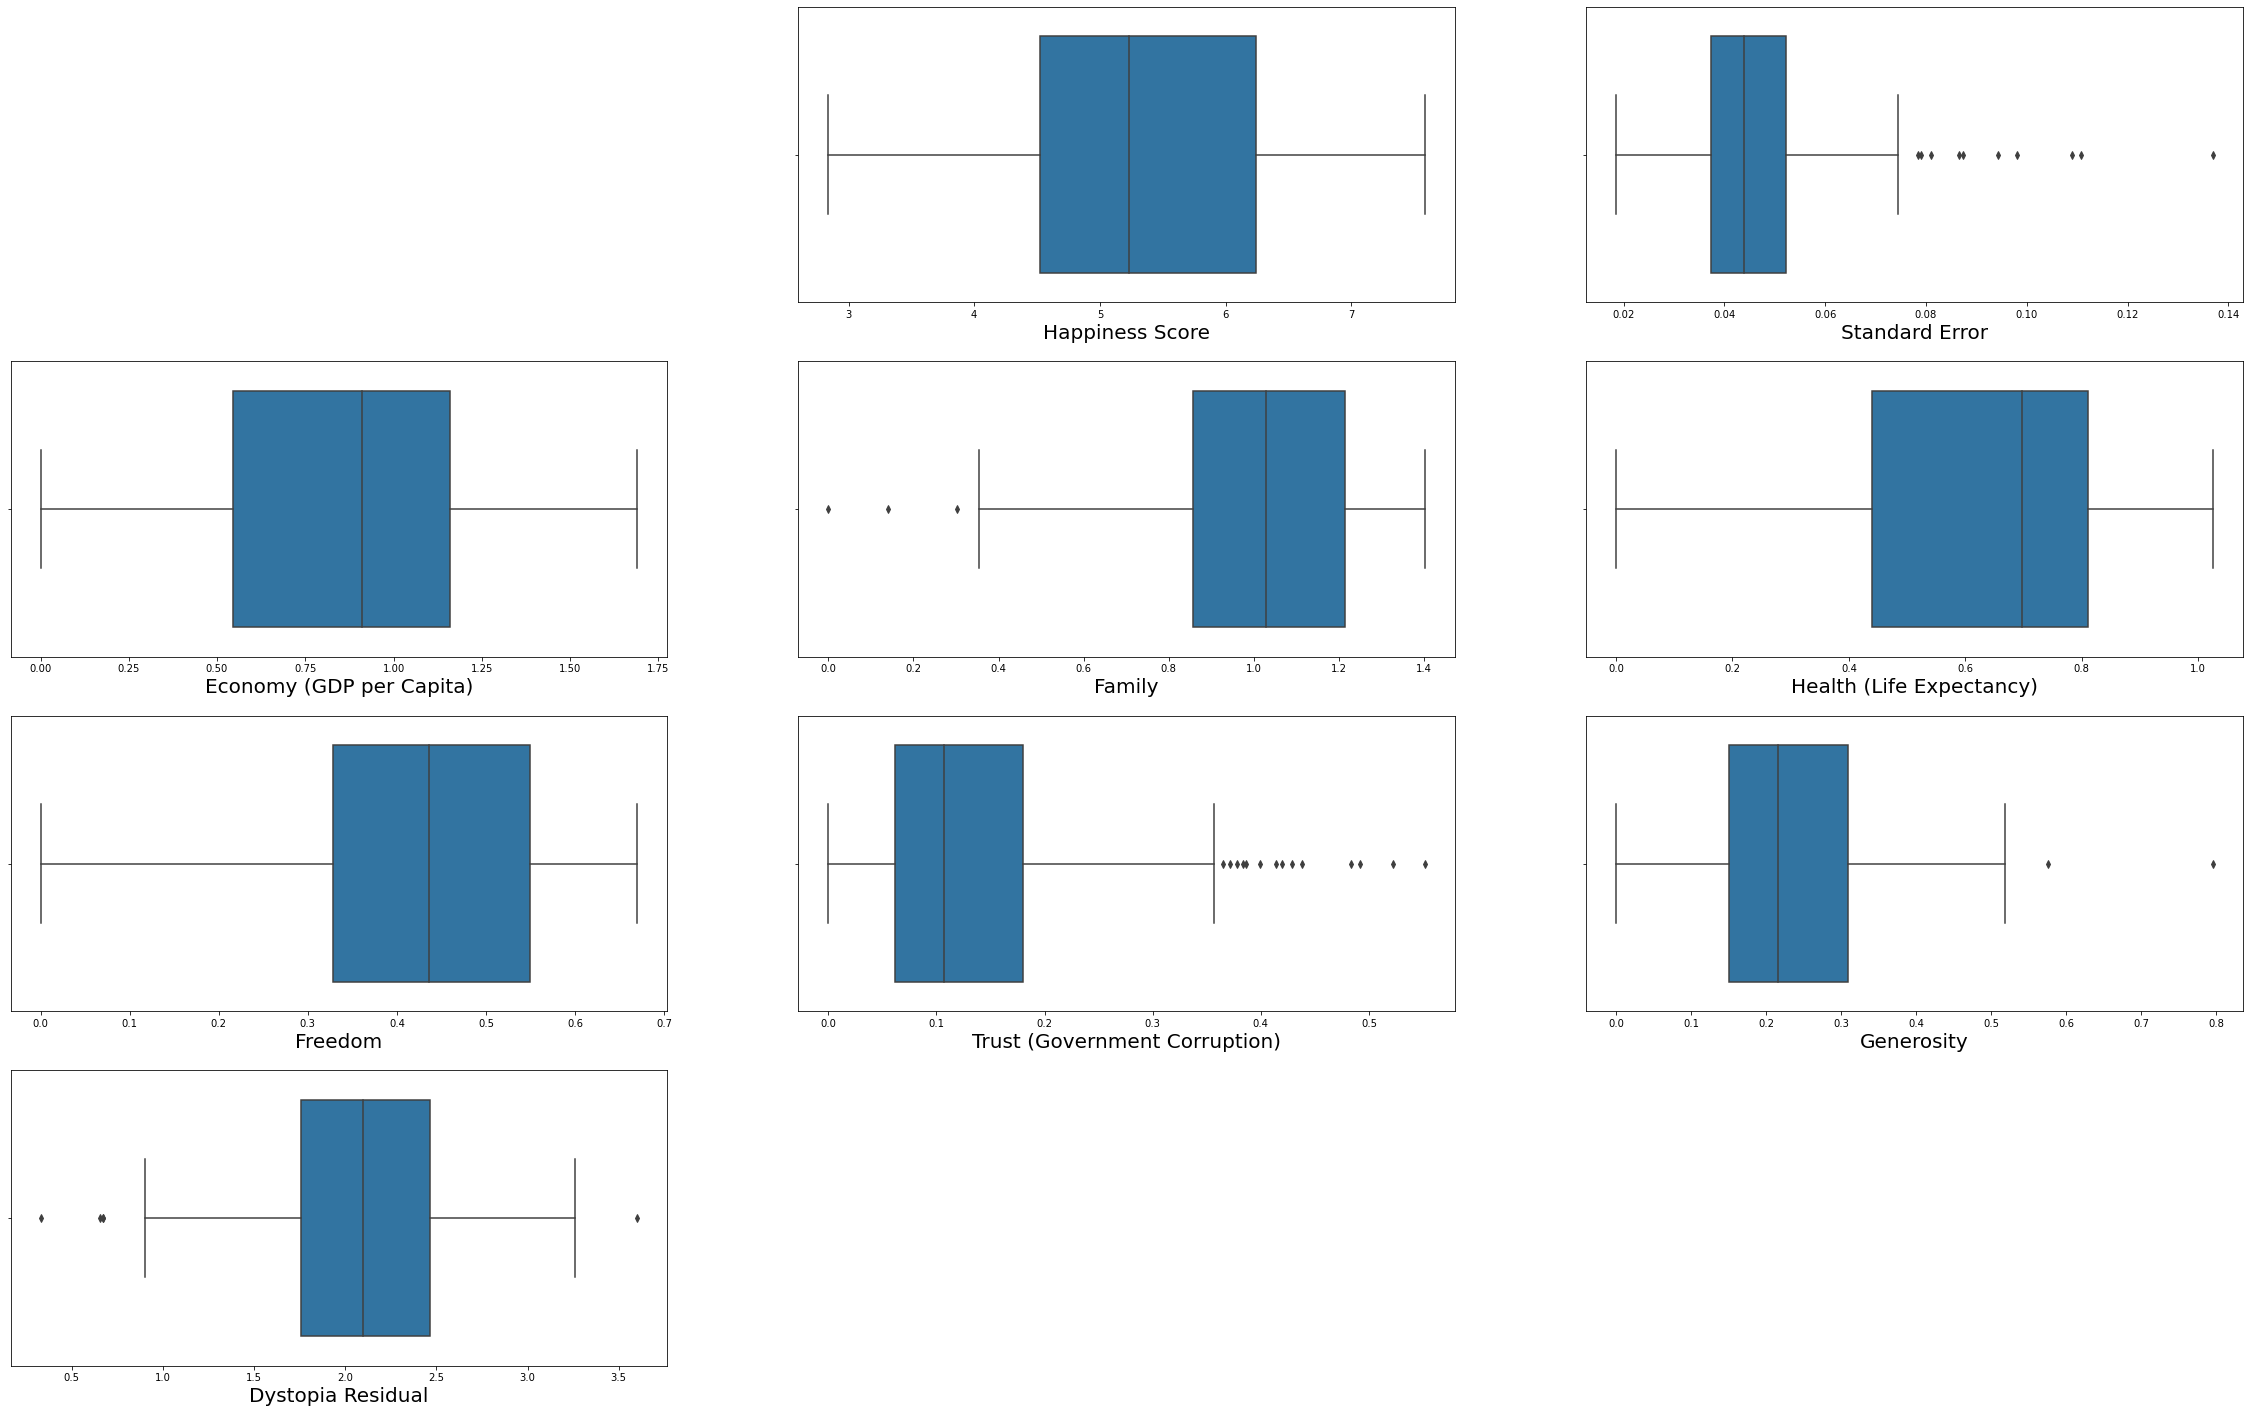

In [132]:
#plotting box plot for my dataframe to check and remove outliers
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df:
    
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        if plotnumber<=12:
            ax = plt.subplot(4,3,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()


In [133]:
#just to check correlation of the data between features
corr_mat = df.corr()

In [134]:
corr_mat

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,1.000000,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Score,-0.176791,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.022600,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.260139,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.168533,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.357508,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.092567,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.165040,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.273557,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.057276,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

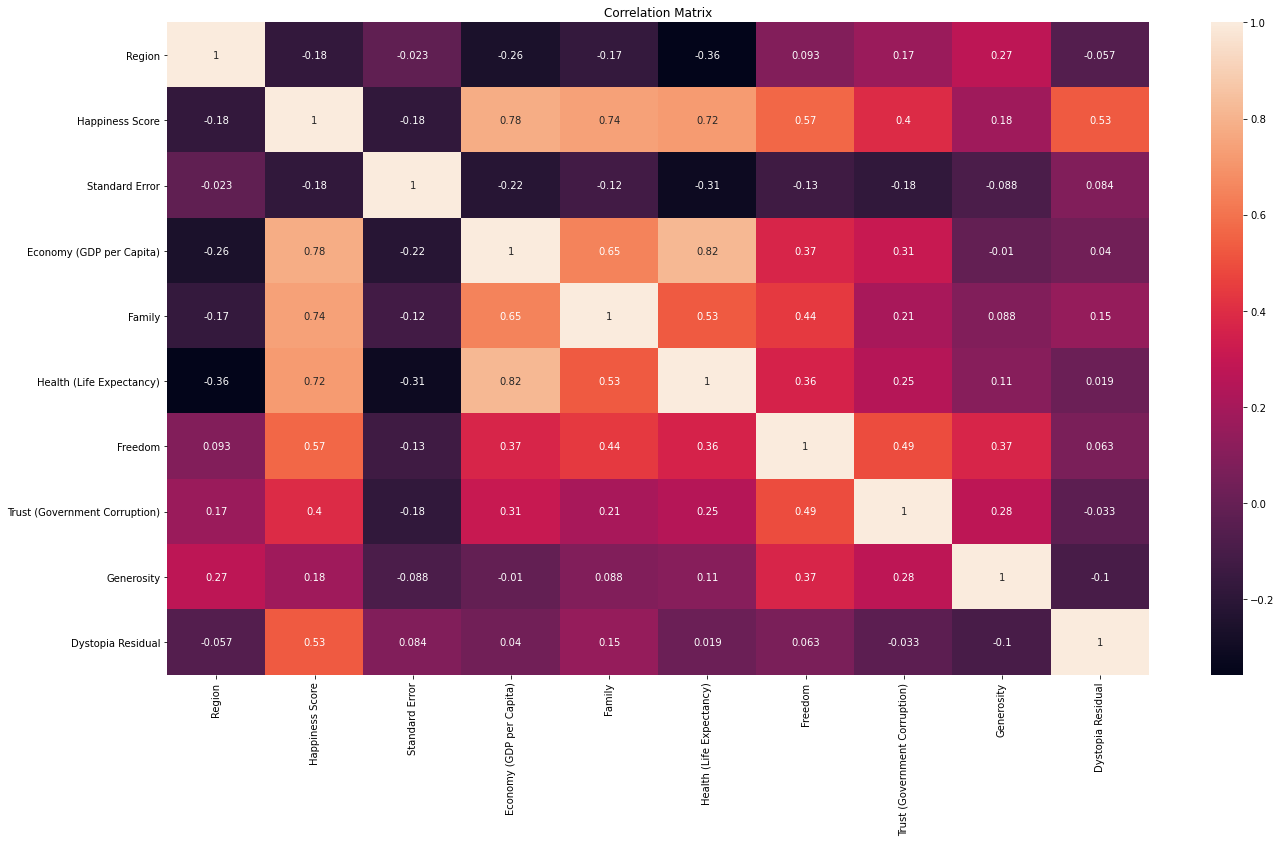

In [135]:
#Visualising heatmap for corr_mat and concluded that  all our features are not corelated
plt.figure(figsize=(22,12),facecolor="white")
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show

In [136]:
#seperating my features and label
X = df.drop('Happiness Score',axis=1)
y = df['Happiness Score']

In [137]:
#importing packages to build my first algorithm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [138]:
# to scale my features.
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [139]:
#checking for is there any VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [140]:
vif

,VIF,Features
0,1.397291,Region
1,1.157363,Standard Error
2,4.144213,Economy (GDP per Capita)
3,1.951082,Family
4,3.819801,Health (Life Expectancy)
5,1.762236,Freedom
6,1.465160,Trust (Government Corruption)
7,1.384677,Generosity
8,1.056176,Dystopia Residual


In [141]:
#splitting my data for test and train
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [142]:
#defining function to find adj_r2
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [143]:
#fitting the algorith and predicting my y
regression = LinearRegression()

regression.fit(x_train,y_train)
y_pred = regression.predict(x_test)
adjr2_Train = adj_r2(x_train,y_train)
adjr2_Test = adj_r2(x_test,y_test)

In [144]:
#printing my evalauation metrics
print('\033[1m''->'*63)
print('\033[1m''Score for Trained data\n',regression.score(x_train,y_train)) #for confusion matrix
print('-'*30)
print('\033[1m''Score for Test data\n',regression.score(x_test,y_test))#for confusion matrix
print('-'*30)
print('\033[1m''Score for Adjusted R2 Test\n',adjr2_Test)
print('-'*30)
print('\033[1m''Score for Adjusted R2 Train\n',adjr2_Train)
print('-'*30)
print('\033[1m''->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Score for Trained data
 0.9999999368570589
------------------------------
Score for Test data
 0.9999999556050995
------------------------------
Score for Adjusted R2 Test
 0.9999999422866293
------------------------------
Score for Adjusted R2 Train
 0.9999999315951471
------------------------------
->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [145]:
#to ensure my model is not overfitted
from  sklearn.model_selection import cross_val_score

In [146]:
a = cross_val_score(regression,X_scaled,y,cv=5).mean()
b = adjr2_Test
b-a

1.7358198578509842e-06

In [147]:
# using Decision tree regressor to my dataset
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor() #Instantiate the LogisticRegression object
DT.fit(x_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred = DT.predict(x_test) #Predict  


In [148]:
# adjusted r2 score  for my DT algorithm
def adj_r21(x,y):
    r2 = DT.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [149]:
#assigning varibale for my scores
adjr21_Train = adj_r21(x_train,y_train)
adjr21_Test = adj_r21(x_test,y_test)

In [150]:
#printing metrics
print('\033[1m''->'*63)
print('\033[1m''Score for Trained data\n',DT.score(x_train,y_train)) #for confusion matrix
print('-'*30)
print('\033[1m''Score for Test data\n',DT.score(x_test,y_test))#for confusion matrix
print('-'*30)
print('\033[1m''Score for Adjusted R2 Test\n',adjr21_Test)
print('-'*30)
print('\033[1m''Score for Adjusted R2 Train\n',adjr21_Train)
print('-'*30)
print('\033[1m''->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Score for Trained data
 1.0
------------------------------
Score for Test data
 0.8345046385044979
------------------------------
Score for Adjusted R2 Test
 0.7848560300558471
------------------------------
Score for Adjusted R2 Train
 1.0
------------------------------
->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [151]:
#cross validation
a = cross_val_score(DT,X_scaled,y,cv=5).mean()
b = adjr21_Test
b-a

7.718644404007983

In [152]:
#Building SVR Model
from sklearn.svm import SVR
svr = SVR() #Instantiate the LogisticRegression object
svr.fit(x_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred = svr.predict(x_test) #Predict  


In [153]:
#function to find adjusted r2
def adj_r22(x,y):
    r2 = svr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

adjr22_Train = adj_r22(x_train,y_train)
adjr22_Test = adj_r22(x_test,y_test)



In [154]:
#printing metrics
print('\033[1m''->'*63)
print('\033[1m''Score for Trained data\n',svr.score(x_train,y_train)) #for confusion matrix
print('-'*30)
print('\033[1m''Score for Test data\n',svr.score(x_test,y_test))#for confusion matrix
print('-'*30)
print('\033[1m''Score for Adjusted R2 Test\n',adjr22_Test)
print('-'*30)
print('\033[1m''Score for Adjusted R2 Train\n',adjr22_Train)
print('-'*30)
print('\033[1m''->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Score for Trained data
 0.9845244823654357
------------------------------
Score for Test data
 0.9125273166374972
------------------------------
Score for Adjusted R2 Test
 0.8862855116287464
------------------------------
Score for Adjusted R2 Train
 0.9832348558958887
------------------------------
->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [155]:
#cross Validation for SVR
a = cross_val_score(svr,X_scaled,y,cv=5).mean()
b = adjr22_Test
b-a

3.9776924559637603

In [156]:
#Building RandomForest Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor() #Instantiate the LogisticRegression object
rf.fit(x_train,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred = rf.predict(x_test) #Predict  


In [157]:
#function to find adjusted r2
def adj_r23(x,y):
    r2 = rf.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

adjr23_Train = adj_r23(x_train,y_train)
adjr23_Test = adj_r23(x_test,y_test)



In [158]:
#Printing Metrics
print('\033[1m''->'*63)
print('\033[1m''Score for Trained data\n',rf.score(x_train,y_train)) #for confusion matrix
print('-'*30)
print('\033[1m''Score for Test data\n',rf.score(x_test,y_test))#for confusion matrix
print('-'*30)
print('\033[1m''Score for Adjusted R2 Test\n',adjr23_Test)
print('-'*30)
print('\033[1m''Score for Adjusted R2 Train\n',adjr23_Train)
print('-'*30)
print('\033[1m''->'*63)

->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->
Score for Trained data
 0.9851555889912981
------------------------------
Score for Test data
 0.9040218696864993
------------------------------
Score for Adjusted R2 Test
 0.8752284305924491
------------------------------
Score for Adjusted R2 Train
 0.9839185547405729
------------------------------
->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->->


In [159]:
#cross Validation for SVR
a = cross_val_score(rf,X_scaled,y,cv=5).mean()
b = adjr23_Test
b-a

4.152309683817505

In [160]:
#Saving the model in pkl file
import joblib
joblib.dump(regression,"Happiness_Score.pkl")

['Happiness_Score.pkl']

In [161]:
model = joblib.load("Happiness_Score.pkl")

In [162]:
#Predicting the saved model
prediction = model.predict(x_test)

In [163]:
#Converting the result into DataFrame
prediction = pd.DataFrame(prediction)

In [164]:
#Saving the result into CSV
prediction.to_csv("Results.csv",index=False)